In [1]:
import sys
import os
sys.path.append("../")

In [2]:
import magnolia

/home/jzuhone/Source/yt/yt/fields/local_fields.py:46: UserWarning: Because 'sampling_type' not specified, yt will assume a cell 'sampling_type'
  warnings.warn("Because 'sampling_type' not specified, yt will "


In [3]:
from magnolia import *
%matplotlib inline

In [4]:
import matplotlib.pyplot as plt
from matplotlib.ticker import Locator


class MinorSymLogLocator(Locator):
    """
    Dynamically find minor tick positions based on the positions of
    major ticks for a symlog scaling.
    """
    def __init__(self, linthresh):
        """
        Ticks will be placed between the major ticks.
        The placement is linear for x between -linthresh and linthresh,
        otherwise its logarithmically
        """
        self.linthresh = linthresh

    def __call__(self):
        'Return the locations of the ticks'
        majorlocs = self.axis.get_majorticklocs()

        # iterate through minor locs
        minorlocs = []

        # handle the lowest part
        for i in range(1, len(majorlocs)):
            majorstep = majorlocs[i] - majorlocs[i-1]
            if abs(majorlocs[i-1] + majorstep/2) < self.linthresh:
                ndivs = 10
            else:
                ndivs = 9
            minorstep = majorstep / ndivs
            locs = np.arange(majorlocs[i-1], majorlocs[i], minorstep)[1:]
            minorlocs.extend(locs)

        return self.raise_if_exceeds(np.array(minorlocs))

    def tick_values(self, vmin, vmax):
        raise NotImplementedError('Cannot get tick locations for a '
                                  '%s type.' % type(self))


/data/mimir/jzuhone/miniconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


<Figure size 432x288 with 0 Axes>

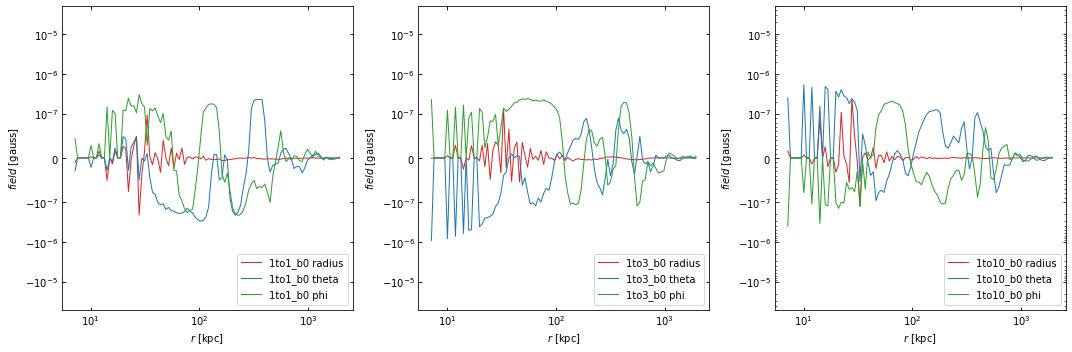

In [5]:
SIM_TYPE11 = "1to1_b0"
SIM_TYPE12 = "1to1_b0.5"
SIM_TYPE13 = "1to1_b1"
SIM_TYPE21 = "1to3_b0"
SIM_TYPE22 = "1to3_b0.5"
SIM_TYPE23 = "1to3_b1"
SIM_TYPE31 = "1to10_b0"
SIM_TYPE32 = "1to10_b0.5"
SIM_TYPE33 = "1to10_b1"

SIM_TYPE11_mag = "../processed-data/1to1_b0"+"_mag.hdf5"
SIM_TYPE12_mag = "../processed-data/1to1_b0.5"+"_mag.hdf5"
SIM_TYPE13_mag = "../processed-data/1to1_b1"+"_mag.hdf5"

SIM_TYPE21_mag = "../processed-data/1to3_b0"+"_mag.hdf5"
SIM_TYPE22_mag = "../processed-data/1to3_b0.5"+"_mag.hdf5"
SIM_TYPE23_mag = "../processed-data/1to3_b1"+"_mag.hdf5"

SIM_TYPE31_mag = "../processed-data/1to10_b0"+"_mag.hdf5"
SIM_TYPE32_mag = "../processed-data/1to10_b0.5"+"_mag.hdf5"
SIM_TYPE33_mag = "../processed-data/1to10_b1"+"_mag.hdf5"

SIM_TYPE11_no_mag = "../processed-data/1to1_b0"+"_no_mag.hdf5"
SIM_TYPE12_no_mag = "../processed-data/1to1_b0.5"+"_no_mag.hdf5"
SIM_TYPE13_no_mag = "../processed-data/1to1_b1"+"_no_mag.hdf5"

SIM_TYPE21_no_mag = "../processed-data/1to3_b0"+"_no_mag.hdf5"
SIM_TYPE22_no_mag = "../processed-data/1to3_b0.5"+"_no_mag.hdf5"
SIM_TYPE23_no_mag = "../processed-data/1to3_b1"+"_no_mag.hdf5"

SIM_TYPE31_no_mag = "../processed-data/1to10_b0"+"_no_mag.hdf5"
SIM_TYPE32_no_mag = "../processed-data/1to10_b0.5"+"_no_mag.hdf5"
SIM_TYPE33_no_mag = "../processed-data/1to10_b1"+"_no_mag.hdf5"

a=00

radius = yt.YTArray.from_hdf5(SIM_TYPE11_mag, dataset_name="/%s/radius"%"profiles_0500_gpot_afterfix")[a:].in_units('kpc')

plt.close('all')
f = plt.figure()
plt.figure(figsize=(15, 5))
#plt.subplots_adjust(hspace=0.001)

# xlim1=2e1
# xlim2=2e3
# ylim1=1e-20
# ylim2=1e-0
# num=(np.log10(xlim2)-np.log10(xlim1))/(np.log10(ylim2)-np.log10(ylim1))

# ax1 = plt.subplot(131, aspect=num)
# ax2 = plt.subplot(132, aspect=num)
# ax3 = plt.subplot(133, aspect=num)


ax1 = plt.subplot(131)
ax2 = plt.subplot(132)
ax3 = plt.subplot(133)
ax1.tick_params(direction='in',top='on',right='on')

axes = [ax1, ax2, ax3]

# magnetic
line_1r_mag, =ax1.plot(radius, get_mean(SIM_TYPE11_mag,"profiles_0500_gpot_afterfix",'magnetic_field_spherical_radius'), 'C3', lw=1, label="1to1_b0 radius")
line_1t_mag, =ax1.plot(radius, get_mean(SIM_TYPE11_mag,"profiles_0500_gpot_afterfix",'magnetic_field_spherical_theta'), 'C0', lw=1, label="1to1_b0 theta")
line_1p_mag, =ax1.plot(radius, get_mean(SIM_TYPE11_mag,"profiles_0500_gpot_afterfix",'magnetic_field_spherical_phi'), 'C2', lw=1, label="1to1_b0 phi")
line_2r_mag, =ax2.plot(radius, get_mean(SIM_TYPE21_mag,"profiles_0500_gpot_afterfix",'magnetic_field_spherical_radius'), 'C3', lw=1, label="1to3_b0 radius")
line_2t_mag, =ax2.plot(radius, get_mean(SIM_TYPE21_mag,"profiles_0500_gpot_afterfix",'magnetic_field_spherical_theta'), 'C0', lw=1, label="1to3_b0 theta")
line_2p_mag, =ax2.plot(radius, get_mean(SIM_TYPE21_mag,"profiles_0500_gpot_afterfix",'magnetic_field_spherical_phi'), 'C2', lw=1, label="1to3_b0 phi")
line_3r_mag, =ax3.plot(radius, get_mean(SIM_TYPE31_mag,"profiles_0500_gpot_afterfix",'magnetic_field_spherical_radius'), 'C3', lw=1, label="1to10_b0 radius")
line_3t_mag, =ax3.plot(radius, get_mean(SIM_TYPE31_mag,"profiles_0500_gpot_afterfix",'magnetic_field_spherical_theta'), 'C0', lw=1, label="1to10_b0 theta")
line_3p_mag, =ax3.plot(radius, get_mean(SIM_TYPE31_mag,"profiles_0500_gpot_afterfix",'magnetic_field_spherical_phi'), 'C2', lw=1, label="1to10_b0 phi")


# non-magnetic
# line_11_no_mag, =ax1.plot(radius, mag_field_mean_squared(SIM_TYPE11_no_mag,"profiles_0500_gpot_afterfix"), 'C3--', lw=1, label="b0_no_mag")
# line_12_no_mag, =ax1.plot(radius, mag_field_mean_squared(SIM_TYPE12_no_mag,"profiles_0500_gpot_afterfix"), 'C0--', lw=1, label="b0.5_no_mag")
# line_13_no_mag, =ax1.plot(radius, mag_field_mean_squared(SIM_TYPE13_no_mag,"profiles_0500_gpot_afterfix"), 'C2--', lw=1, label="b1_no_mag")
# line_21_no_mag, =ax2.plot(radius, mag_field_mean_squared(SIM_TYPE21_no_mag,"profiles_0500_gpot_afterfix"), 'C3--', lw=1, label="b0_no_mag")
# line_22_no_mag, =ax2.plot(radius, mag_field_mean_squared(SIM_TYPE22_no_mag,"profiles_0500_gpot_afterfix"), 'C0--', lw=1, label="b0.5_no_mag")
# line_23_no_mag, =ax2.plot(radius, mag_field_mean_squared(SIM_TYPE23_no_mag,"profiles_0500_gpot_afterfix"), 'C2--', lw=1, label="b1_no_mag")
# line_31_no_mag, =ax3.plot(radius, mag_field_mean_squared(SIM_TYPE31_no_mag,"profiles_0500_gpot_afterfix"), 'C3--', lw=1, label="b0_no_mag")
# line_32_no_mag, =ax3.plot(radius, mag_field_mean_squared(SIM_TYPE32_no_mag,"profiles_0500_gpot_afterfix"), 'C0--', lw=1, label="b0.5_no_mag")
# line_33_no_mag, =ax3.plot(radius, mag_field_mean_squared(SIM_TYPE33_no_mag,"profiles_0500_gpot_afterfix"), 'C2--', lw=1, label="b1_no_mag")

ax1.legend(handles=[line_1r_mag,line_1t_mag,line_1p_mag], loc=4)
#ax2.legend(handles=[line_21_mag,line_22_mag,line_23_mag], loc=3)
ax2.legend(handles=[line_2r_mag,line_2t_mag,line_2p_mag], loc=4)

#ax3.legend(handles=[line_31_mag,line_32_mag,line_33_mag], loc=3)
ax3.legend(handles=[line_3r_mag,line_3t_mag,line_3p_mag], loc=4)

#format axes
for plot_ax in axes:
    plot_ax.tick_params(axis='both',
                    which='both',
                    direction='in',
                    bottom='on',
                    top='on',
                    left='on',
                    right='on')

    plot_ax.set_ylabel(r"$field$ [%s]" % get_units(get_mean(SIM_TYPE11_mag,"profiles_0500_gpot_afterfix",'magnetic_field_spherical_radius'))) #% get_units(velocity_mean_squared(SIM_TYPE11_mag,"profiles_0500")))

    plot_ax.set_xscale('symlog')
    plot_ax.set_yscale('symlog', linthreshy=1e-7)
    #plot_ax.set_xlim(xlim1,xlim2)
    plot_ax.set_ylim(-5e-5,5e-5)
    
    yaxis = plt.gca().yaxis
    yaxis.set_minor_locator(MinorSymLogLocator(1e-7))

    plot_ax.set_xlabel("$r$ [kpc]")

    #plot_ax.set_xlim(0.0, 10000.0)
#ax1.set_ylabel("testLABEL")
#ax1.set_title('Time Series (%s)')
plt.tight_layout()
plt.show()

/data/mimir/jzuhone/miniconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


<Figure size 432x288 with 0 Axes>

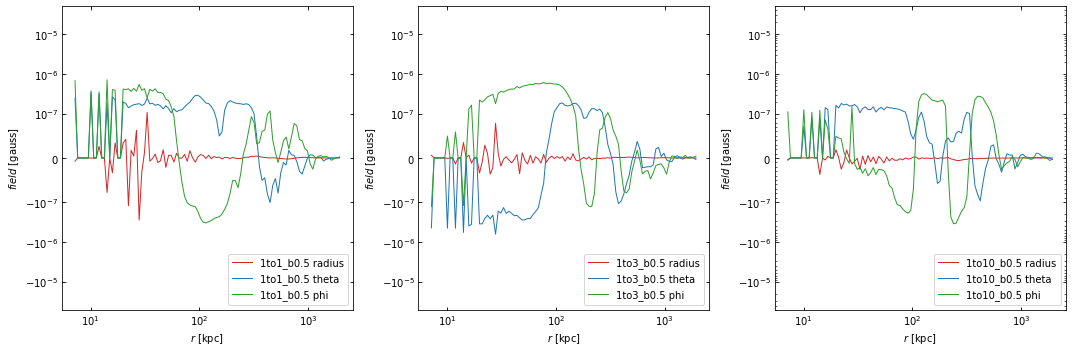

In [6]:
SIM_TYPE11 = "1to1_b0"
SIM_TYPE12 = "1to1_b0.5"
SIM_TYPE13 = "1to1_b1"
SIM_TYPE21 = "1to3_b0"
SIM_TYPE22 = "1to3_b0.5"
SIM_TYPE23 = "1to3_b1"
SIM_TYPE31 = "1to10_b0"
SIM_TYPE32 = "1to10_b0.5"
SIM_TYPE33 = "1to10_b1"

SIM_TYPE11_mag = "../processed-data/1to1_b0"+"_mag.hdf5"
SIM_TYPE12_mag = "../processed-data/1to1_b0.5"+"_mag.hdf5"
SIM_TYPE13_mag = "../processed-data/1to1_b1"+"_mag.hdf5"

SIM_TYPE21_mag = "../processed-data/1to3_b0"+"_mag.hdf5"
SIM_TYPE22_mag = "../processed-data/1to3_b0.5"+"_mag.hdf5"
SIM_TYPE23_mag = "../processed-data/1to3_b1"+"_mag.hdf5"

SIM_TYPE31_mag = "../processed-data/1to10_b0"+"_mag.hdf5"
SIM_TYPE32_mag = "../processed-data/1to10_b0.5"+"_mag.hdf5"
SIM_TYPE33_mag = "../processed-data/1to10_b1"+"_mag.hdf5"

SIM_TYPE11_no_mag = "../processed-data/1to1_b0"+"_no_mag.hdf5"
SIM_TYPE12_no_mag = "../processed-data/1to1_b0.5"+"_no_mag.hdf5"
SIM_TYPE13_no_mag = "../processed-data/1to1_b1"+"_no_mag.hdf5"

SIM_TYPE21_no_mag = "../processed-data/1to3_b0"+"_no_mag.hdf5"
SIM_TYPE22_no_mag = "../processed-data/1to3_b0.5"+"_no_mag.hdf5"
SIM_TYPE23_no_mag = "../processed-data/1to3_b1"+"_no_mag.hdf5"

SIM_TYPE31_no_mag = "../processed-data/1to10_b0"+"_no_mag.hdf5"
SIM_TYPE32_no_mag = "../processed-data/1to10_b0.5"+"_no_mag.hdf5"
SIM_TYPE33_no_mag = "../processed-data/1to10_b1"+"_no_mag.hdf5"

a=00

radius = yt.YTArray.from_hdf5(SIM_TYPE11_mag, dataset_name="/%s/radius"%"profiles_0500_gpot_afterfix")[a:].in_units('kpc')

plt.close('all')
f = plt.figure()
plt.figure(figsize=(15, 5))
#plt.subplots_adjust(hspace=0.001)

# xlim1=2e1
# xlim2=2e3
# ylim1=1e-20
# ylim2=1e-0
# num=(np.log10(xlim2)-np.log10(xlim1))/(np.log10(ylim2)-np.log10(ylim1))

# ax1 = plt.subplot(131, aspect=num)
# ax2 = plt.subplot(132, aspect=num)
# ax3 = plt.subplot(133, aspect=num)


ax1 = plt.subplot(131)
ax2 = plt.subplot(132)
ax3 = plt.subplot(133)
ax1.tick_params(direction='in',top='on',right='on')

axes = [ax1, ax2, ax3]

# magnetic
line_1r_mag, =ax1.plot(radius, get_mean(SIM_TYPE12_mag,"profiles_0500_gpot_afterfix",'magnetic_field_spherical_radius'), 'C3', lw=1, label="1to1_b0.5 radius")
line_1t_mag, =ax1.plot(radius, get_mean(SIM_TYPE12_mag,"profiles_0500_gpot_afterfix",'magnetic_field_spherical_theta'), 'C0', lw=1, label="1to1_b0.5 theta")
line_1p_mag, =ax1.plot(radius, get_mean(SIM_TYPE12_mag,"profiles_0500_gpot_afterfix",'magnetic_field_spherical_phi'), 'C2', lw=1, label="1to1_b0.5 phi")
line_2r_mag, =ax2.plot(radius, get_mean(SIM_TYPE22_mag,"profiles_0500_gpot_afterfix",'magnetic_field_spherical_radius'), 'C3', lw=1, label="1to3_b0.5 radius")
line_2t_mag, =ax2.plot(radius, get_mean(SIM_TYPE22_mag,"profiles_0500_gpot_afterfix",'magnetic_field_spherical_theta'), 'C0', lw=1, label="1to3_b0.5 theta")
line_2p_mag, =ax2.plot(radius, get_mean(SIM_TYPE22_mag,"profiles_0500_gpot_afterfix",'magnetic_field_spherical_phi'), 'C2', lw=1, label="1to3_b0.5 phi")
line_3r_mag, =ax3.plot(radius, get_mean(SIM_TYPE32_mag,"profiles_0500_gpot_afterfix",'magnetic_field_spherical_radius'), 'C3', lw=1, label="1to10_b0.5 radius")
line_3t_mag, =ax3.plot(radius, get_mean(SIM_TYPE32_mag,"profiles_0500_gpot_afterfix",'magnetic_field_spherical_theta'), 'C0', lw=1, label="1to10_b0.5 theta")
line_3p_mag, =ax3.plot(radius, get_mean(SIM_TYPE32_mag,"profiles_0500_gpot_afterfix",'magnetic_field_spherical_phi'), 'C2', lw=1, label="1to10_b0.5 phi")


# non-magnetic
# line_11_no_mag, =ax1.plot(radius, mag_field_mean_squared(SIM_TYPE11_no_mag,"profiles_0500_gpot_afterfix"), 'C3--', lw=1, label="b0_no_mag")
# line_12_no_mag, =ax1.plot(radius, mag_field_mean_squared(SIM_TYPE12_no_mag,"profiles_0500_gpot_afterfix"), 'C0--', lw=1, label="b0.5_no_mag")
# line_13_no_mag, =ax1.plot(radius, mag_field_mean_squared(SIM_TYPE13_no_mag,"profiles_0500_gpot_afterfix"), 'C2--', lw=1, label="b1_no_mag")
# line_21_no_mag, =ax2.plot(radius, mag_field_mean_squared(SIM_TYPE21_no_mag,"profiles_0500_gpot_afterfix"), 'C3--', lw=1, label="b0_no_mag")
# line_22_no_mag, =ax2.plot(radius, mag_field_mean_squared(SIM_TYPE22_no_mag,"profiles_0500_gpot_afterfix"), 'C0--', lw=1, label="b0.5_no_mag")
# line_23_no_mag, =ax2.plot(radius, mag_field_mean_squared(SIM_TYPE23_no_mag,"profiles_0500_gpot_afterfix"), 'C2--', lw=1, label="b1_no_mag")
# line_31_no_mag, =ax3.plot(radius, mag_field_mean_squared(SIM_TYPE31_no_mag,"profiles_0500_gpot_afterfix"), 'C3--', lw=1, label="b0_no_mag")
# line_32_no_mag, =ax3.plot(radius, mag_field_mean_squared(SIM_TYPE32_no_mag,"profiles_0500_gpot_afterfix"), 'C0--', lw=1, label="b0.5_no_mag")
# line_33_no_mag, =ax3.plot(radius, mag_field_mean_squared(SIM_TYPE33_no_mag,"profiles_0500_gpot_afterfix"), 'C2--', lw=1, label="b1_no_mag")

ax1.legend(handles=[line_1r_mag,line_1t_mag,line_1p_mag], loc=4)
#ax2.legend(handles=[line_21_mag,line_22_mag,line_23_mag], loc=3)
ax2.legend(handles=[line_2r_mag,line_2t_mag,line_2p_mag], loc=4)

#ax3.legend(handles=[line_31_mag,line_32_mag,line_33_mag], loc=3)
ax3.legend(handles=[line_3r_mag,line_3t_mag,line_3p_mag], loc=4)

#format axes
for plot_ax in axes:
    plot_ax.tick_params(axis='both',
                    which='both',
                    direction='in',
                    bottom='on',
                    top='on',
                    left='on',
                    right='on')

    plot_ax.set_ylabel(r"$field$ [%s]" % get_units(get_mean(SIM_TYPE11_mag,"profiles_0500_gpot_afterfix",'magnetic_field_spherical_radius'))) #% get_units(velocity_mean_squared(SIM_TYPE11_mag,"profiles_0500")))

    plot_ax.set_xscale('symlog')
    plot_ax.set_yscale('symlog', linthreshy=1e-7)
    #plot_ax.set_xlim(xlim1,xlim2)
    plot_ax.set_ylim(-5e-5,5e-5)
    
    yaxis = plt.gca().yaxis
    yaxis.set_minor_locator(MinorSymLogLocator(1e-7))

    plot_ax.set_xlabel("$r$ [kpc]")

    #plot_ax.set_xlim(0.0, 10000.0)
#ax1.set_ylabel("testLABEL")
#ax1.set_title('Time Series (%s)')
plt.tight_layout()
plt.show()

/data/mimir/jzuhone/miniconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


<Figure size 432x288 with 0 Axes>

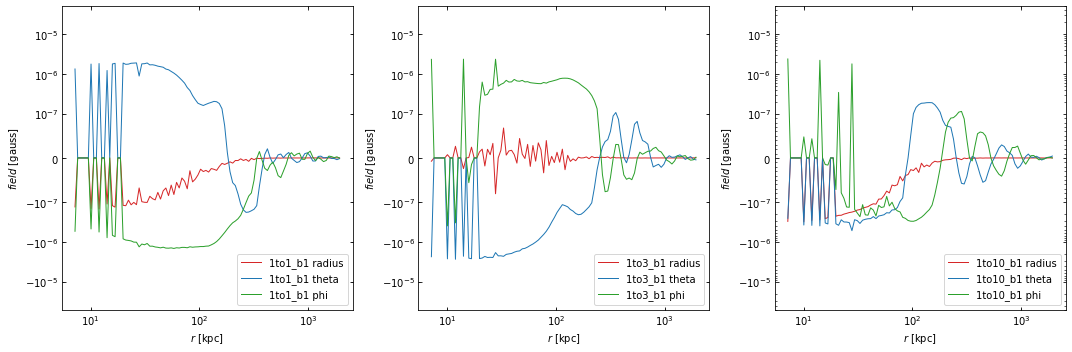

In [7]:
SIM_TYPE11 = "1to1_b0"
SIM_TYPE12 = "1to1_b0.5"
SIM_TYPE13 = "1to1_b1"
SIM_TYPE21 = "1to3_b0"
SIM_TYPE22 = "1to3_b0.5"
SIM_TYPE23 = "1to3_b1"
SIM_TYPE31 = "1to10_b0"
SIM_TYPE32 = "1to10_b0.5"
SIM_TYPE33 = "1to10_b1"

SIM_TYPE11_mag = "../processed-data/1to1_b0"+"_mag.hdf5"
SIM_TYPE12_mag = "../processed-data/1to1_b0.5"+"_mag.hdf5"
SIM_TYPE13_mag = "../processed-data/1to1_b1"+"_mag.hdf5"

SIM_TYPE21_mag = "../processed-data/1to3_b0"+"_mag.hdf5"
SIM_TYPE22_mag = "../processed-data/1to3_b0.5"+"_mag.hdf5"
SIM_TYPE23_mag = "../processed-data/1to3_b1"+"_mag.hdf5"

SIM_TYPE31_mag = "../processed-data/1to10_b0"+"_mag.hdf5"
SIM_TYPE32_mag = "../processed-data/1to10_b0.5"+"_mag.hdf5"
SIM_TYPE33_mag = "../processed-data/1to10_b1"+"_mag.hdf5"

SIM_TYPE11_no_mag = "../processed-data/1to1_b0"+"_no_mag.hdf5"
SIM_TYPE12_no_mag = "../processed-data/1to1_b0.5"+"_no_mag.hdf5"
SIM_TYPE13_no_mag = "../processed-data/1to1_b1"+"_no_mag.hdf5"

SIM_TYPE21_no_mag = "../processed-data/1to3_b0"+"_no_mag.hdf5"
SIM_TYPE22_no_mag = "../processed-data/1to3_b0.5"+"_no_mag.hdf5"
SIM_TYPE23_no_mag = "../processed-data/1to3_b1"+"_no_mag.hdf5"

SIM_TYPE31_no_mag = "../processed-data/1to10_b0"+"_no_mag.hdf5"
SIM_TYPE32_no_mag = "../processed-data/1to10_b0.5"+"_no_mag.hdf5"
SIM_TYPE33_no_mag = "../processed-data/1to10_b1"+"_no_mag.hdf5"

a=00

radius = yt.YTArray.from_hdf5(SIM_TYPE11_mag, dataset_name="/%s/radius"%"profiles_0500_gpot_afterfix")[a:].in_units('kpc')

plt.close('all')
f = plt.figure()
plt.figure(figsize=(15, 5))
#plt.subplots_adjust(hspace=0.001)

# xlim1=2e1
# xlim2=2e3
# ylim1=1e-20
# ylim2=1e-0
# num=(np.log10(xlim2)-np.log10(xlim1))/(np.log10(ylim2)-np.log10(ylim1))

# ax1 = plt.subplot(131, aspect=num)
# ax2 = plt.subplot(132, aspect=num)
# ax3 = plt.subplot(133, aspect=num)


ax1 = plt.subplot(131)
ax2 = plt.subplot(132)
ax3 = plt.subplot(133)
ax1.tick_params(direction='in',top='on',right='on')

axes = [ax1, ax2, ax3]

# magnetic
line_1r_mag, =ax1.plot(radius, get_mean(SIM_TYPE13_mag,"profiles_0000_gpot_afterfix",'magnetic_field_spherical_radius'), 'C3', lw=1, label="1to1_b1 radius")
line_1t_mag, =ax1.plot(radius, get_mean(SIM_TYPE13_mag,"profiles_0000_gpot_afterfix",'magnetic_field_spherical_theta'), 'C0', lw=1, label="1to1_b1 theta")
line_1p_mag, =ax1.plot(radius, get_mean(SIM_TYPE13_mag,"profiles_0000_gpot_afterfix",'magnetic_field_spherical_phi'), 'C2', lw=1, label="1to1_b1 phi")
line_2r_mag, =ax2.plot(radius, get_mean(SIM_TYPE23_mag,"profiles_0000_gpot_afterfix",'magnetic_field_spherical_radius'), 'C3', lw=1, label="1to3_b1 radius")
line_2t_mag, =ax2.plot(radius, get_mean(SIM_TYPE23_mag,"profiles_0000_gpot_afterfix",'magnetic_field_spherical_theta'), 'C0', lw=1, label="1to3_b1 theta")
line_2p_mag, =ax2.plot(radius, get_mean(SIM_TYPE23_mag,"profiles_0000_gpot_afterfix",'magnetic_field_spherical_phi'), 'C2', lw=1, label="1to3_b1 phi")
line_3r_mag, =ax3.plot(radius, get_mean(SIM_TYPE33_mag,"profiles_0000_gpot_afterfix",'magnetic_field_spherical_radius'), 'C3', lw=1, label="1to10_b1 radius")
line_3t_mag, =ax3.plot(radius, get_mean(SIM_TYPE33_mag,"profiles_0000_gpot_afterfix",'magnetic_field_spherical_theta'), 'C0', lw=1, label="1to10_b1 theta")
line_3p_mag, =ax3.plot(radius, get_mean(SIM_TYPE33_mag,"profiles_0000_gpot_afterfix",'magnetic_field_spherical_phi'), 'C2', lw=1, label="1to10_b1 phi")


# non-magnetic
# line_11_no_mag, =ax1.plot(radius, mag_field_mean_squared(SIM_TYPE11_no_mag,"profiles_0500_gpot_afterfix"), 'C3--', lw=1, label="b0_no_mag")
# line_12_no_mag, =ax1.plot(radius, mag_field_mean_squared(SIM_TYPE12_no_mag,"profiles_0500_gpot_afterfix"), 'C0--', lw=1, label="b0.5_no_mag")
# line_13_no_mag, =ax1.plot(radius, mag_field_mean_squared(SIM_TYPE13_no_mag,"profiles_0500_gpot_afterfix"), 'C2--', lw=1, label="b1_no_mag")
# line_21_no_mag, =ax2.plot(radius, mag_field_mean_squared(SIM_TYPE21_no_mag,"profiles_0500_gpot_afterfix"), 'C3--', lw=1, label="b0_no_mag")
# line_22_no_mag, =ax2.plot(radius, mag_field_mean_squared(SIM_TYPE22_no_mag,"profiles_0500_gpot_afterfix"), 'C0--', lw=1, label="b0.5_no_mag")
# line_23_no_mag, =ax2.plot(radius, mag_field_mean_squared(SIM_TYPE23_no_mag,"profiles_0500_gpot_afterfix"), 'C2--', lw=1, label="b1_no_mag")
# line_31_no_mag, =ax3.plot(radius, mag_field_mean_squared(SIM_TYPE31_no_mag,"profiles_0500_gpot_afterfix"), 'C3--', lw=1, label="b0_no_mag")
# line_32_no_mag, =ax3.plot(radius, mag_field_mean_squared(SIM_TYPE32_no_mag,"profiles_0500_gpot_afterfix"), 'C0--', lw=1, label="b0.5_no_mag")
# line_33_no_mag, =ax3.plot(radius, mag_field_mean_squared(SIM_TYPE33_no_mag,"profiles_0500_gpot_afterfix"), 'C2--', lw=1, label="b1_no_mag")

ax1.legend(handles=[line_1r_mag,line_1t_mag,line_1p_mag], loc=4)
#ax2.legend(handles=[line_21_mag,line_22_mag,line_23_mag], loc=3)
ax2.legend(handles=[line_2r_mag,line_2t_mag,line_2p_mag], loc=4)

#ax3.legend(handles=[line_31_mag,line_32_mag,line_33_mag], loc=3)
ax3.legend(handles=[line_3r_mag,line_3t_mag,line_3p_mag], loc=4)

#format axes
for plot_ax in axes:
    plot_ax.tick_params(axis='both',
                    which='both',
                    direction='in',
                    bottom='on',
                    top='on',
                    left='on',
                    right='on')

    plot_ax.set_ylabel(r"$field$ [%s]" % get_units(get_mean(SIM_TYPE11_mag,"profiles_0500_gpot_afterfix",'magnetic_field_spherical_radius'))) #% get_units(velocity_mean_squared(SIM_TYPE11_mag,"profiles_0500")))

    plot_ax.set_xscale('symlog')
    plot_ax.set_yscale('symlog', linthreshy=1e-7)
    #plot_ax.set_xlim(xlim1,xlim2)
    plot_ax.set_ylim(-5e-5,5e-5)
    
    yaxis = plt.gca().yaxis
    yaxis.set_minor_locator(MinorSymLogLocator(1e-7))

    plot_ax.set_xlabel("$r$ [kpc]")

    #plot_ax.set_xlim(0.0, 10000.0)
#ax1.set_ylabel("testLABEL")
#ax1.set_title('Time Series (%s)')
plt.tight_layout()
plt.show()

In [ ]:
110


In [ ]:
ds = yt.load("/data/mimir/jzuhone/data/fid/1to1_b0.5/fiducial_1to1_b0.5_hdf5_plt_cnt_0110")

In [ ]:
ds

In [ ]:
slc = yt.SlicePlot(ds, 'z', 'density', width = (8,'Mpc'))
slc.annotate_timestamp(redshift=False,draw_inset_box=True)
 
slc.annotate_marker((newcenter[0].in_units('Mpc'),newcenter[1].in_units('Mpc')), coord_system='plot',
                  plot_args={'color':'blue','s':100})
slc.annotate_marker((oldcenter[0].in_units('Mpc'),oldcenter[1].in_units('Mpc')), coord_system='plot',
                  plot_args={'color':'red','s':100})
slc.show()

In [ ]:
magnolia

In [ ]:
list_groups(SIM_TYPE12_no_mag)

In [ ]:
list_fieldnames(SIM_TYPE12_no_mag,'time_series_0.15r_500_100part')

In [ ]:
newcenter = get_field(SIM_TYPE12_no_mag,'time_series_0.15r_500_100part','centers')[22]

In [ ]:
oldcenter = get_field(SIM_TYPE12_no_mag,'time_series_0.15r_500','centers')[22]

In [ ]:
k=get_field(SIM_TYPE12_no_mag,'time_series_0.15r_500_100part','turbulent_kinetic_energy')[22]/get_field(SIM_TYPE12_no_mag,'time_series_0.15r_500_100part','mass')[22]

In [ ]:
k.in_units("cm**2/s**2")

In [ ]:
get_field(SIM_TYPE12_no_mag,'time_series_0.15r_500_100part','mass').in_units('Msun')

In [ ]:
get_field(SIM_TYPE12_no_mag,'time_series_0.15r_500_100part','turbulent_kinetic_energy')

In [ ]:
#data_fns = glob.glob(full_path_header + '0[0-5][05][05]')
data_fns = glob.glob('/data/mimir/jzuhone/data/fid/1to1_b0.5/fiducial_1to1_b0.5_hdf5_plt_cnt_0[0-9][0-9][05]')
# Sort them
data_fns.sort()

# Get a collection of datasets to iterate over
ts = yt.DatasetSeries(data_fns)
axis='z'

# Now loop over the datasets
for i in range(0,len(data_fns)):

    ds = yt.load(data_fns[i])
    newcenter = get_field(SIM_TYPE12_no_mag,'time_series_0.15r_500_100part','centers')[i]
    oldcenter = get_field(SIM_TYPE12_no_mag,'time_series_0.15r_500','centers')[i]

    slc = yt.SlicePlot(ds, 'z', 'density', width = (8,'Mpc'))
    slc.annotate_timestamp(redshift=False,draw_inset_box=True)

    slc.annotate_marker((newcenter[0].in_units('Mpc'),newcenter[1].in_units('Mpc')), coord_system='plot',
                      plot_args={'color':'blue','s':100})
    slc.annotate_marker((oldcenter[0].in_units('Mpc'),oldcenter[1].in_units('Mpc')), coord_system='plot',
                      plot_args={'color':'red','s':100})
    slc.save('ANNOTATEPLOT')
    print('%s saved' % (ds))

In [ ]:
data_fns

In [ ]:
for i in range(0,len(data_fns)):
    print(i)

In [1]:
import sys
import os
sys.path.append("../")

import magnolia

from magnolia import *
%matplotlib inline

data_dir = '/data/mimir/jzuhone/data/'
hdf5_dir = 'processed-data'

sim_names = ['1to1_b0']

# do all profiles
for sim_name in sim_names:

    hdf5_filename = 'test.hdf5'
    # sample groupnames: profiles_0250, profiles_0250_gpot,
    # profiles_0250_gpot_afterfix, 'profiles_0250_80b'
    hdf5_groupname = 'profiles_0000_gpot_afterfix'
    hdf5_groupname1 = 'profiles_0000_most_bound'

    ds_header = 'fiducial_%s_mag_hdf5_plt_cnt_' % sim_name
    ds_full_path = data_dir+'fid_mag/'+sim_name+'/'+ds_header+'0000'

    field_list = ['kT',
                  'density',
                  'velocity_spherical_radius',
                  'velocity_spherical_theta',
                  'velocity_spherical_phi',
                  'magnetic_field_spherical_radius',
                  'magnetic_field_spherical_theta',
                  'magnetic_field_spherical_phi',
                  'magnetic_field_x',
                  'magnetic_field_y',
                  'magnetic_field_z']

    magnolia.make_profiles(ds_full_path,
                           field_list,
                           hdf5_dir,
                           hdf5_filename,
                           hdf5_groupname1,
                           center_method = 'most_bound')


/home/jzuhone/Source/yt/yt/fields/local_fields.py:46: UserWarning: Because 'sampling_type' not specified, yt will assume a cell 'sampling_type'
  warnings.warn("Because 'sampling_type' not specified, yt will "
yt : [INFO     ] 2018-03-06 13:53:18,235 Particle file found: fiducial_1to1_b0_mag_hdf5_part_0000
yt : [INFO     ] 2018-03-06 13:53:18,270 Parameters: current_time              = 0.0
yt : [INFO     ] 2018-03-06 13:53:18,271 Parameters: domain_dimensions         = [16 16 16]
yt : [INFO     ] 2018-03-06 13:53:18,273 Parameters: domain_left_edge          = [ -2.20000000e+25  -2.20000000e+25  -2.20000000e+25]
yt : [INFO     ] 2018-03-06 13:53:18,274 Parameters: domain_right_edge         = [  2.20000000e+25   2.20000000e+25   2.20000000e+25]
yt : [INFO     ] 2018-03-06 13:53:18,276 Parameters: cosmological_simulation   = 0.0


Finding gravitational potential minimum
Creating profiles
Finished creating profiles
Writing profiles
Finished writing profiles
